In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv('Mall_Customers.csv')

In [67]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
df.shape

(200, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
X= df.iloc[:, [3,4]].values

In [71]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [84]:
from sklearn.cluster import KMeans
wcss=[]

In [85]:
n=int(input('enter the maximum clusters you want:'))
for i in range(1,n):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

enter the maximum clusters you want:16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

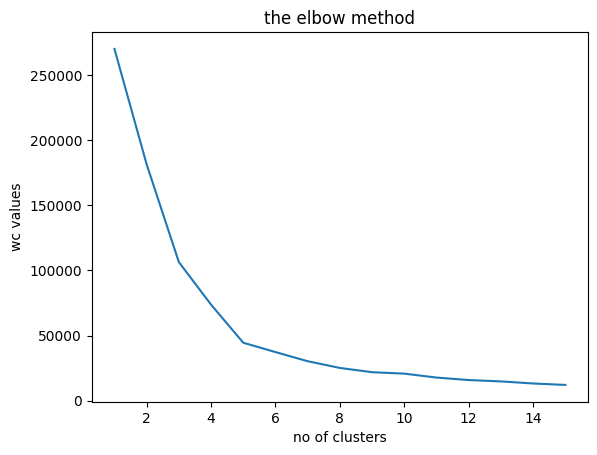

In [86]:
plt.plot(range (1,n),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wc values')
plt.show

In [87]:
kmeansmodel= KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
#finding the centroid points
kmeans.cluster_centers_

array([[ 60.4       ,  53.1       ],
       [ 76.66666667,  10.06666667],
       [100.875     ,  84.25      ],
       [ 37.42857143,  65.        ],
       [ 24.58333333,   9.58333333],
       [ 78.28571429,  90.5       ],
       [ 93.46153846,  21.38461538],
       [ 47.09375   ,  49.28125   ],
       [ 66.42105263,  40.        ],
       [ 26.66666667,  93.66666667],
       [127.66666667,  78.66666667],
       [ 28.18181818,  33.27272727],
       [ 77.78571429,  73.28571429],
       [124.        ,  17.5       ],
       [ 22.33333333,  75.83333333]])

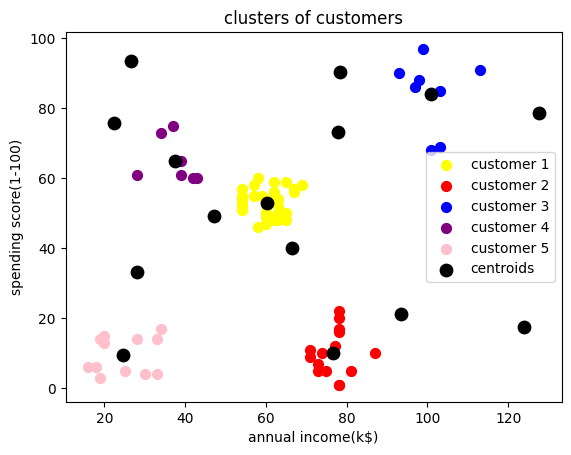

In [89]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s=50, c='yellow', label='customer 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s=50, c='red', label='customer 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=50, c='blue', label='customer 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s=50, c='purple', label='customer 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1],s=50, c='pink', label='customer 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=80, c='black', label='centroids')
plt.xlabel('annual income(k$)')
plt.ylabel('spending score(1-100)')
plt.title('clusters of customers')
plt.legend()
plt.show()

In [ ]:
#for any company the middle red cluster is the target
# customers in the red cluster have annual income nearly equal to the spending
